In [2]:
import numpy as np
from math import exp,sqrt
import cv2
import matplotlib.pyplot as plt

In [39]:
def bilateralFilterMine(im,d,sigma_d,sigma_r):
    print(im.shape)
    im_r=im.shape[0]
    im_c=im.shape[1]
    d2 = d//2
    pad = d-1
    im = cv2.copyMakeBorder(im, pad, pad, pad, pad, cv2.BORDER_CONSTANT,0)
    print(im.shape)
    final=np.zeros((im_r,im_c))
    new = np.ones((d,d))
    for i in range(im_r):
        for j in range(im_c):
            for m in range(d):
                for n in range(d):
                    im_part=im[i:i+d,j:j+d]
                    k1 = exp((-1/(2*sigma_d*sigma_d))*((m-d2)**2+(n-d2)**2))
                    k2 = exp((-1/(2*sigma_r*sigma_r))*((im_part[m,n]-im_part[d2,d2])**2))
                    new[m,n] = k1*k2
            sumArr = np.sum(new)
            new=new/sumArr
            final[i,j] = np.sum(np.multiply(im_part,new))
        
    return final

In [40]:
sky = cv2.imread("../input_data/sky.png",0)
sky1 = cv2.bilateralFilter(sky,7,7,12,12)
sky2 = bilateralFilterMine(sky,7,12,12)

noir = cv2.imread("../input_data/noir.png",0)
noir1 = cv2.bilateralFilter(noir,7,7,12,12)
noir2 = bilateralFilterMine(noir,7,12,12)




(480, 640)


/home/anushka/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


(480, 640)


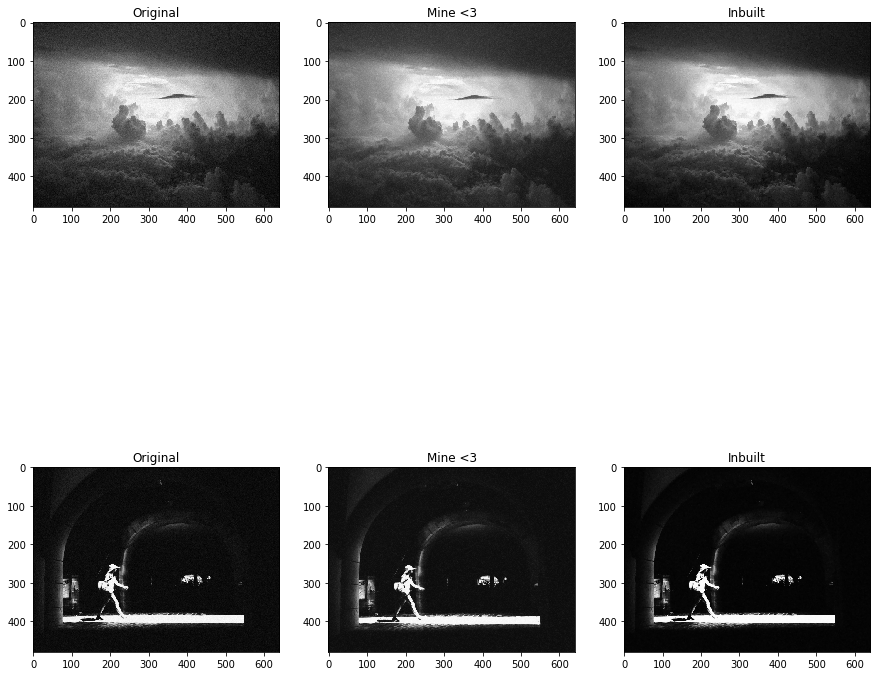

In [41]:
# fig = plt.figure()
fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(sky,'gray')
plt.title("Original")
plt.subplot(2,3,2)
plt.imshow(sky2,'gray')
plt.title("Mine <3")
plt.subplot(2,3,3)
plt.imshow(sky1,'gray')
plt.title("Inbuilt")
plt.subplot(2,3,4)
plt.imshow(noir,'gray')
plt.title("Original")
plt.subplot(2,3,5)
plt.imshow(noir2,'gray')
plt.title("Mine <3")
plt.subplot(2,3,6)
plt.imshow(noir1,'gray')
plt.title("Inbuilt")
plt.show()

## part b

In [4]:
def calculateDistance(i1, i2):
    return np.sum((i1-i2)**2)

In [42]:
sky = cv2.imread("../input_data/gt_sky.png",0)
sky2 = bilateralFilterMine(sky,7,25,50)

dist = sqrt(calculateDistance(sky,sky2))
print(dist)

(480, 640)


/home/anushka/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


6254.344743714972
